In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [ ]:
#upload file to colab
from google.colab import files
uploaded = files.upload()

Saving wine_255.csv to wine_255.csv


In [ ]:
df = pd.read_csv('wine_255.csv')

In [ ]:
df.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [ ]:
df['quality_category'].value_counts(normalize=True)

quality_category
2    0.436330
3    0.329259
1    0.166177
4    0.037753
0    0.030481
Name: proportion, dtype: float64

We can see that this dataset is imbalanced so it would be challenging to find a good model.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality_category      6463 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 707.0+ KB


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

1168

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe(include='all', percentiles=[.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
count,5295,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.218008,0.344021,0.318782,5.051029,0.056690,30.046837,114.118225,0.994536,3.224385,0.533199,10.550154,2.199245
std,NaN,1.320690,0.168237,0.147112,4.500641,0.036901,17.827151,56.787187,0.002969,0.160155,0.149851,1.186533,0.862123
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
1%,NaN,5.000000,0.120000,0.000000,0.900000,0.021000,3.000000,10.000000,0.988890,2.890000,0.300000,8.700000,0.000000
10%,NaN,5.900000,0.180000,0.130000,1.300000,0.031000,9.000000,29.000000,0.990600,3.030000,0.380000,9.200000,1.000000
25%,NaN,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,2.000000


By comparing the 99th percentile and the maximum values, we can see that there are some outliers in the dataset that need to be addressed. also, there is an object (type variable) in the dataset that should be transform to numeric data type.

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6462
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5295 non-null   float64
 1   volatile acidity      5295 non-null   float64
 2   citric acid           5295 non-null   float64
 3   residual sugar        5295 non-null   float64
 4   chlorides             5295 non-null   float64
 5   free sulfur dioxide   5295 non-null   float64
 6   total sulfur dioxide  5295 non-null   float64
 7   density               5295 non-null   float64
 8   pH                    5295 non-null   float64
 9   sulphates             5295 non-null   float64
 10  alcohol               5295 non-null   float64
 11  quality_category      5295 non-null   int64  
 12  type_white            5295 non-null   bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 542.9 KB


To better understand outliers in variables, their box plot will be depicted.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

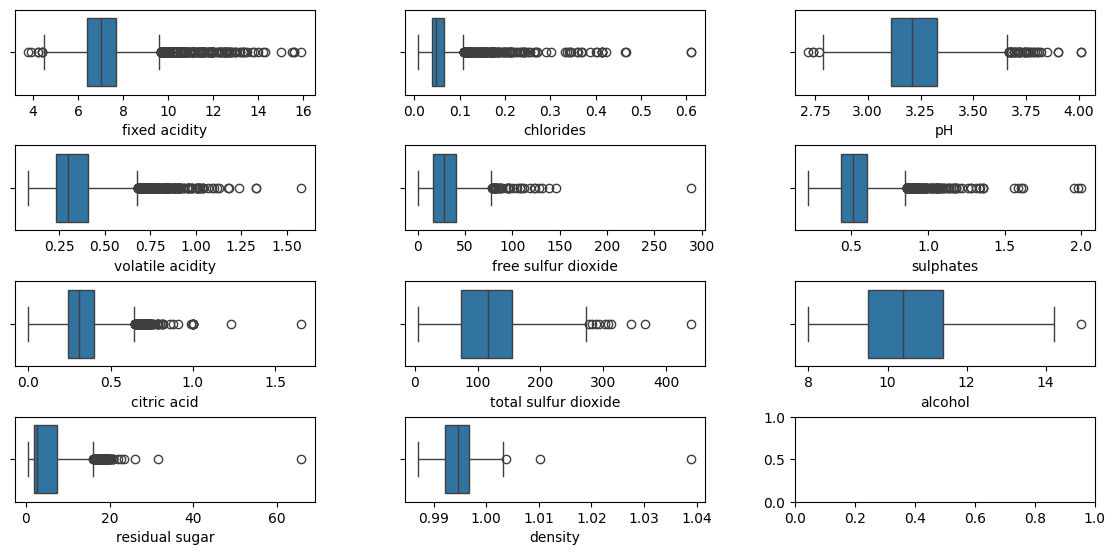

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(12, 6))
sns.boxplot(ax=axes[0,0], x=df['fixed acidity'])
sns.boxplot(ax=axes[1,0], x=df['volatile acidity'])
sns.boxplot(ax=axes[2,0], x=df['citric acid'])
sns.boxplot(ax=axes[3,0], x=df['residual sugar'])
sns.boxplot(ax=axes[0,1], x=df['chlorides'])
sns.boxplot(ax=axes[1,1], x=df['free sulfur dioxide'])
sns.boxplot(ax=axes[2,1], x=df['total sulfur dioxide'])
sns.boxplot(ax=axes[3,1], x=df['density'])
sns.boxplot(ax=axes[0,2], x=df['pH'])
sns.boxplot(ax=axes[1,2], x=df['sulphates'])
sns.boxplot(ax=axes[2,2], x=df['alcohol'])
fig.subplots_adjust(left=0.08, right=0.98, bottom=0.08, top=0.9,
                    hspace=0.6, wspace=0.3)
plt.show()

We can see in most of the variables there are outliers. In order to address them, we can examine what coefficient for inter quantile would be a good number to use for handling outliers.

In [ ]:
# Calculate upper threshold
q1 = df['residual sugar'].quantile(0.25)
q3 = df['residual sugar'].quantile(0.75)
iqr = q3 - q1
print(q3+iqr*4)

30.3


After examinig different number for different variables, it seems that 4 would be a good fit to our variables. So we use it to address outliers in the dataset.

In [ ]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:

        # Calculate upper threshold
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [ ]:
outlier_imputer(['fixed acidity','chlorides','volatile acidity','free sulfur dioxide','sulphates','citric acid','residual sugar', 'density'], 4)

fixed acidity
q3: 7.7
upper_threshold: 12.899999999999999
count    5295.000000
mean        7.213909
std         1.299856
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        12.900000
Name: fixed acidity, dtype: float64

chlorides
q3: 0.066
upper_threshold: 0.17800000000000002
count    5295.000000
mean        0.055372
std         0.027812
min         0.009000
25%         0.038000
50%         0.047000
75%         0.066000
max         0.178000
Name: chlorides, dtype: float64

volatile acidity
q3: 0.41
upper_threshold: 1.13
count    5295.000000
mean        0.343820
std         0.167125
min         0.080000
25%         0.230000
50%         0.300000
75%         0.410000
max         1.130000
Name: volatile acidity, dtype: float64

free sulfur dioxide
q3: 41.0
upper_threshold: 141.0
count    5295.000000
mean       30.017847
std        17.527950
min         1.000000
25%        16.000000
50%        28.000000
75%        41.000000
max       141.000000
Nam

Now, dataset seems to be ready for building models. First we should split data into train and test considering imbalanced target variable.

In [ ]:
X = df.drop(['quality_category'], axis=1)
y = df['quality_category']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

Next, we are going to fit *random forest* and *SVM* to clasify our data.

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)

y_rf_test = rf.predict(X_test_scaled)
print('accuracy: ', accuracy_score(y_test, y_rf_test))
print('f1 score: ', f1_score(y_test, y_rf_test, average="macro"))
print('precision: ', precision_score(y_test, y_rf_test, average="macro"))   # "macro" ---> does not take into account imbalance
print('recall: ', recall_score(y_test, y_rf_test, average="macro"))

accuracy:  0.5599622285174694
f1 score:  0.3379446592565924
precision:  0.4926663734633525
recall:  0.32892739362847057


In [ ]:
confusion_matrix(y_test, y_rf_test)

array([[  0,   7,  24,   0,   0],
       [  1,  44, 125,   0,   0],
       [  1,  25, 346,  90,   0],
       [  0,   2, 146, 200,   1],
       [  0,   1,  15,  28,   3]])

In [ ]:
print(classification_report(y_test, y_rf_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.56      0.26      0.35       170
           2       0.53      0.75      0.62       462
           3       0.63      0.57      0.60       349
           4       0.75      0.06      0.12        47

    accuracy                           0.56      1059
   macro avg       0.49      0.33      0.34      1059
weighted avg       0.56      0.56      0.53      1059



In [ ]:
# clasify using SVM
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='auto')
svm.fit(X_train_scaled, y_train)

y_svm_test = svm.predict(X_test_scaled)
print('accuracy: ', accuracy_score(y_test, y_svm_test))
print('f1 score: ', f1_score(y_test, y_svm_test, average="macro"))
print('precision: ', precision_score(y_test, y_svm_test, average="macro"))   # "macro" ---> does not take into account imbalance
print('recall: ', recall_score(y_test, y_svm_test, average="macro"))

accuracy:  0.5580736543909348
f1 score:  0.37422354609633435
precision:  0.4375118440614553
recall:  0.35658599502494626


In [ ]:
confusion_matrix(y_test, y_svm_test)

array([[  0,   9,  21,   1,   0],
       [  5,  46, 119,   0,   0],
       [  0,  32, 333,  95,   2],
       [  0,   5, 135, 202,   7],
       [  0,   1,  14,  22,  10]])

In [ ]:
print(classification_report(y_test, y_svm_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.49      0.27      0.35       170
           2       0.54      0.72      0.61       462
           3       0.63      0.58      0.60       349
           4       0.53      0.21      0.30        47

    accuracy                           0.56      1059
   macro avg       0.44      0.36      0.37      1059
weighted avg       0.54      0.56      0.54      1059



Since we have an imbalanced dataset, we primarily focus on the F1 score and macro average for our evaluation metrics. As observed, the accuracy metrics for both models are approximately the same. However, in terms of the F1 score, the SVM model performs better with a score of 0.37 compared to 0.34 for the random forest model. Additionally, while the precision for SVM is lower than that of the random forest, the recall is higher for SVM. Therefore, SVM appears to have better overall performance.